In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
%matplotlib inline
import plotnine as p9
from tensorflow.keras.callbacks import TensorBoard
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

In [7]:
todos = []

df = pd.read_excel('C:/Users/axel/Desktop/datos_ingresantes.xlsx', index_col=None, header=2) 
df.columns

Index(['fecha_relev', 'carrera', 'nombre_carrera', 'ingreso', 'sexo',
       'loc_periodo_lectivo', 'loc_procedencia', 'pais_procedencia',
       'prov_procedencia', 'depto_procedencia', 'fecha_nacimiento',
       'estado_civil', 'cant_hijos', 'vive_con', 'tiene_beca', 'beca',
       'costea_estudios', 'obra_social', 'trabajo', 'horas_sem_trabajo',
       'padre_vive', 'padre_ult_est_curs', 'padre_trabajo', 'madre_vive',
       'madre_ult_est_curs', 'madre_trabajo', 'dep_practica', 'dep_prac_fut',
       'dep_prac_bas', 'dep_prac_vol', 'dep_prac_gim', 'dep_prac_ten',
       'dep_prac_nat', 'dep_prac_han', 'dep_prac_otros', 'idioma_ingles',
       'idioma_franc', 'idioma_portu', 'idioma_itali', 'idioma_aleman',
       'idioma_otro', 'nombre_colegio_sec', 'titulo_sec', 'tec_pc_casa',
       'tec_pc_trab', 'tec_pc_univ', 'tec_pc_otro', 'tec_int_casa',
       'tec_int_trab', 'tec_int_univ', 'tec_int_cyber', 'tec_int_otro',
       'tec_usint_cha', 'tec_usint_cap', 'tec_usint_est', 'tec_usin

In [39]:
df2 = df[['carrera','nombre_carrera','idioma_ingles','idioma_franc','idioma_portu','idioma_itali','idioma_aleman','idioma_otro','matcursprisem','fechaapro_matematica_al_21-10-2017','nota_matematica','cantmataprob_al_21-10-2017','promedio_con_aplaz_al_21-10-2017','promedio_sin_aplaz_al_21-10-2017','egresado']]

In [40]:
df2.columns

Index(['carrera', 'nombre_carrera', 'idioma_ingles', 'idioma_franc',
       'idioma_portu', 'idioma_itali', 'idioma_aleman', 'idioma_otro',
       'matcursprisem', 'fechaapro_matematica_al_21-10-2017',
       'nota_matematica', 'cantmataprob_al_21-10-2017',
       'promedio_con_aplaz_al_21-10-2017', 'promedio_sin_aplaz_al_21-10-2017',
       'egresado'],
      dtype='object')

In [41]:
df2.dtypes

carrera                                object
nombre_carrera                         object
idioma_ingles                          object
idioma_franc                           object
idioma_portu                           object
idioma_itali                           object
idioma_aleman                          object
idioma_otro                            object
matcursprisem                           int64
fechaapro_matematica_al_21-10-2017     object
nota_matematica                        object
cantmataprob_al_21-10-2017              int64
promedio_con_aplaz_al_21-10-2017      float64
promedio_sin_aplaz_al_21-10-2017      float64
egresado                               object
dtype: object

In [12]:
df2

,nombre_carrera,idioma_ingles,idioma_franc,idioma_portu,idioma_itali,idioma_aleman,idioma_otro,matcursprisem,fechaapro_matematica_al_21-10-2017,nota_matematica,cantmataprob_al_21-10-2017,promedio_con_aplaz_al_21-10-2017,promedio_sin_aplaz_al_21-10-2017
0,Ciencias Biológicas,Ingles: Básico,Frances: Desconoce,Portugués: Desconoce,Italiano: Desconoce,Alemán: Desconoce,NaN,0,NaN,NaN,0,NaN,NaN
1,Ciencias Geológicas,Ingles: Básico,Frances: Desconoce,Portugués: Desconoce,Italiano: Desconoce,Alemán: Desconoce,NaN,1,NaN,NaN,1,NaN,NaN
2,Ingeniería en Computación,Ingles: Bueno,Frances: Desconoce,Portugués: Desconoce,Italiano: Desconoce,Alemán: Desconoce,NaN,2,2017-03-08,A,2,NaN,NaN
3,Ingeniería Civil,Ingles: Básico,Frances: Desconoce,Portugués: Desconoce,Italiano: Desconoce,Alemán: Desconoce,NaN,0,2017-03-01,A,3,NaN,NaN
4,Ciencias Biológicas,Ingles: Bueno,Frances: Desconoce,Portugués: Desconoce,Italiano: Desconoce,Alemán: Desconoce,NaN,0,NaN,NaN,0,NaN,NaN
5,Ingeniería Civil,Ingles: Desconoce,Frances: Desconoce,Portugués: Desconoce,Italiano: Desconoce,Alemán: Desconoce,NaN,2,NaN,NaN,2,2.00,NaN
6,Ingeniería Aeronáutica,Ingles: Muy Bueno,Frances: Bueno,Portugués: Desconoce,Italiano: Desconoce,Alemán: Bueno,NaN,4,2017-03-01,A,5,7.00,7.00
7,Ciencias Biológicas,Ingles: Muy Bueno,Frances: Desconoce,Portugués: Desconoce,Italiano: Básico,Alemán: Desconoce,NaN,1,2017-06-28,A,7,7.67,7.67
8,Ingeniería Industrial,Ingles: Básico,Frances: Desconoce,Portugués: Desconoce,Italiano: Desconoce,Alemán: Desconoce,NaN,2,NaN,NaN,2,7.00,7.00
9,Ingeniería Biomédica,Ingles: Básico,Frances: Desconoce,Portugués: Desconoce,Italiano: Desconoce,Alemán: Desconoce,NaN,0,NaN,NaN,0,NaN,NaN


In [21]:
len(df2[pd.isnull(df2.matcursprisem)])

0

In [22]:
df2.to_csv('C:/Users/axel/Desktop/datos_de_idioma.csv', index=False)

In [23]:
df3 = pd.read_csv ("C:/Users/axel/Desktop/datos_de_idioma.csv")

In [25]:
df3

,nombre_carrera,idioma_ingles,idioma_franc,idioma_portu,idioma_itali,idioma_aleman,idioma_otro,matcursprisem,fechaapro_matematica_al_21-10-2017,nota_matematica,cantmataprob_al_21-10-2017,promedio_con_aplaz_al_21-10-2017,promedio_sin_aplaz_al_21-10-2017
0,Ciencias Biológicas,Ingles: Básico,Frances: Desconoce,Portugués: Desconoce,Italiano: Desconoce,Alemán: Desconoce,NaN,0,NaN,NaN,0,NaN,NaN
1,Ciencias Geológicas,Ingles: Básico,Frances: Desconoce,Portugués: Desconoce,Italiano: Desconoce,Alemán: Desconoce,NaN,1,NaN,NaN,1,NaN,NaN
2,Ingeniería en Computación,Ingles: Bueno,Frances: Desconoce,Portugués: Desconoce,Italiano: Desconoce,Alemán: Desconoce,NaN,2,2017-03-08,A,2,NaN,NaN
3,Ingeniería Civil,Ingles: Básico,Frances: Desconoce,Portugués: Desconoce,Italiano: Desconoce,Alemán: Desconoce,NaN,0,2017-03-01,A,3,NaN,NaN
4,Ciencias Biológicas,Ingles: Bueno,Frances: Desconoce,Portugués: Desconoce,Italiano: Desconoce,Alemán: Desconoce,NaN,0,NaN,NaN,0,NaN,NaN
5,Ingeniería Civil,Ingles: Desconoce,Frances: Desconoce,Portugués: Desconoce,Italiano: Desconoce,Alemán: Desconoce,NaN,2,NaN,NaN,2,2.00,NaN
6,Ingeniería Aeronáutica,Ingles: Muy Bueno,Frances: Bueno,Portugués: Desconoce,Italiano: Desconoce,Alemán: Bueno,NaN,4,2017-03-01,A,5,7.00,7.00
7,Ciencias Biológicas,Ingles: Muy Bueno,Frances: Desconoce,Portugués: Desconoce,Italiano: Básico,Alemán: Desconoce,NaN,1,2017-06-28,A,7,7.67,7.67
8,Ingeniería Industrial,Ingles: Básico,Frances: Desconoce,Portugués: Desconoce,Italiano: Desconoce,Alemán: Desconoce,NaN,2,NaN,NaN,2,7.00,7.00
9,Ingeniería Biomédica,Ingles: Básico,Frances: Desconoce,Portugués: Desconoce,Italiano: Desconoce,Alemán: Desconoce,NaN,0,NaN,NaN,0,NaN,NaN


In [28]:
df3.head(0)

,nombre_carrera,idioma_ingles,idioma_franc,idioma_portu,idioma_itali,idioma_aleman,idioma_otro,matcursprisem,fechaapro_matematica_al_21-10-2017,nota_matematica,cantmataprob_al_21-10-2017,promedio_con_aplaz_al_21-10-2017,promedio_sin_aplaz_al_21-10-2017


In [29]:
df3['promedio_con_aplaz_al_21-10-2017'].unique()

array([  nan,  2.  ,  7.  ,  7.67,  3.5 ,  6.33,  5.67,  8.5 ,  6.  ,
        5.  ,  8.  ,  7.5 ,  3.25,  9.  ,  3.  ,  5.33,  8.25,  4.5 ,
        8.33,  7.33,  4.  ,  4.33,  2.8 ,  7.25,  5.8 ,  7.2 ,  6.2 ,
        6.5 ,  2.75,  9.33,  5.25,  5.4 ,  4.67,  9.5 ,  7.4 ,  6.25,
        6.88,  8.2 ,  5.75,  7.75,  8.75,  3.33,  3.8 ,  6.29,  6.67,
        7.6 ,  3.67,  4.75,  4.4 ,  7.8 ,  5.6 ,  5.2 ,  9.25,  5.83,
        6.6 ,  4.6 ,  6.75,  2.5 ,  5.5 ,  9.75,  6.4 ,  3.2 ,  8.14,
        3.75,  4.25,  2.67,  5.14,  8.6 ,  3.7 ,  7.29,  8.67,  3.83,
        8.4 ,  1.5 ,  4.8 ,  4.16,  2.43,  3.6 ,  4.2 ,  9.4 ,  2.33,
        3.4 ,  4.17,  5.17,  4.71, 10.  ,  4.83])

In [32]:
df3['nota_matematica'].unique()

array([nan, 'A', '7'], dtype=object)

In [31]:
df3.dtypes

nombre_carrera                         object
idioma_ingles                          object
idioma_franc                           object
idioma_portu                           object
idioma_itali                           object
idioma_aleman                          object
idioma_otro                            object
matcursprisem                           int64
fechaapro_matematica_al_21-10-2017     object
nota_matematica                        object
cantmataprob_al_21-10-2017              int64
promedio_con_aplaz_al_21-10-2017      float64
promedio_sin_aplaz_al_21-10-2017      float64
dtype: object

In [34]:
df3['promedio_con_aplaz_al_21-10-2017'].mean()

5.879407850964734

In [35]:
df3['idioma_ingles'].unique()

array(['Ingles: Básico      ', 'Ingles: Bueno       ',
       'Ingles: Desconoce   ', 'Ingles: Muy Bueno   ', nan], dtype=object)

Text(0, 0.5, 'promedio_con_aplaz_al_21-10-2017')

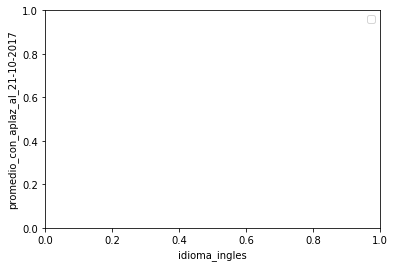

In [45]:
plt.legend(df3)
plt.xlabel('idioma_ingles')
plt.ylabel('promedio_con_aplaz_al_21-10-2017')

C:\Users\axel\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 1219 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


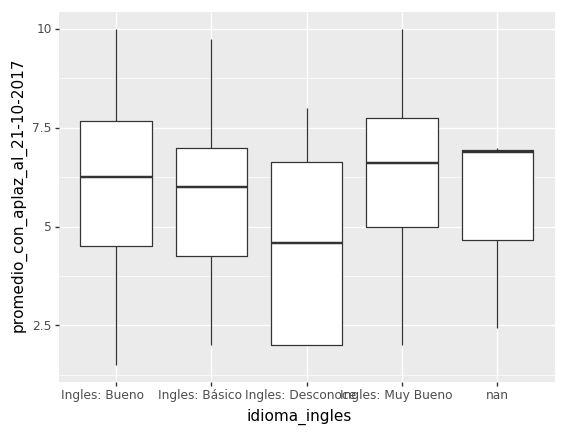

<ggplot: (124980479394)>

In [46]:
(p9.ggplot(data=df3,
           mapping=p9.aes(x='idioma_ingles',
                          y='promedio_con_aplaz_al_21-10-2017'))
    + p9.geom_boxplot()
)

C:\Users\axel\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 1219 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\axel\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_jitter : Removed 1219 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


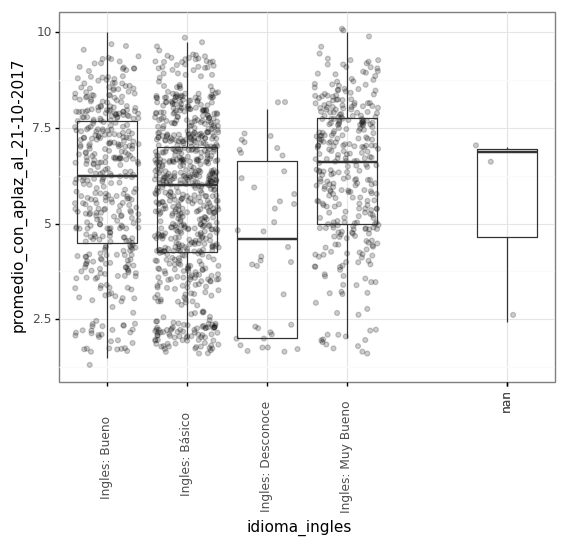

<ggplot: (-9223371911874147861)>

In [49]:
(p9.ggplot(data=df3,
           mapping=p9.aes(x='idioma_ingles',
                          y='promedio_con_aplaz_al_21-10-2017'))
    + p9.geom_jitter(alpha=0.2)
    + p9.geom_boxplot(alpha=0.)
    + p9.theme_bw()
    + p9.theme(axis_text_x = p9.element_text(angle=90))
)

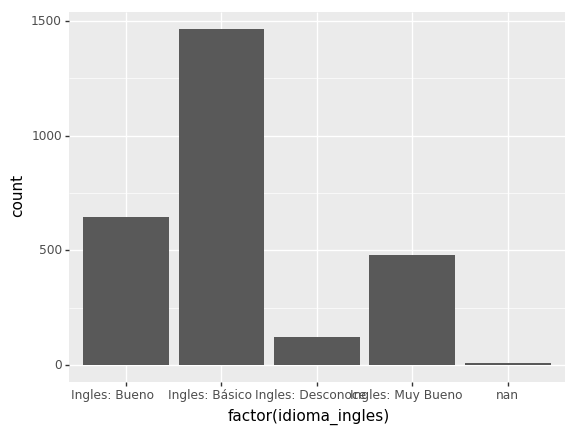

<ggplot: (124981922252)>

In [58]:
(p9.ggplot(data=df3,
           mapping=p9.aes(x='factor(idioma_ingles)'))
    + p9.geom_bar()
)

C:\Users\axel\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


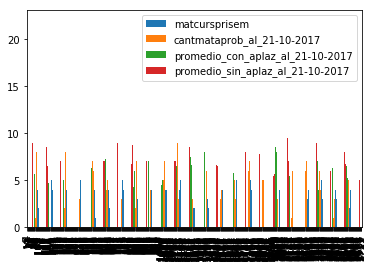

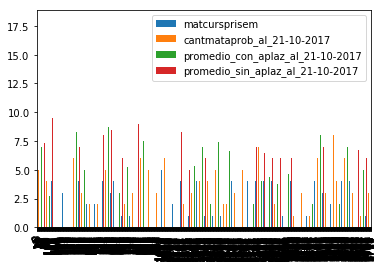

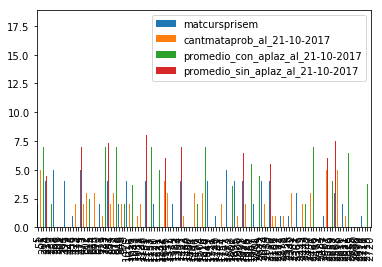

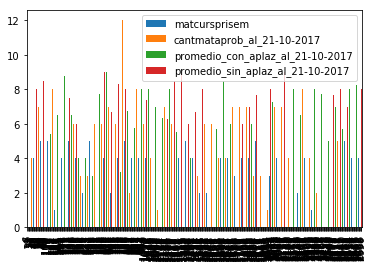

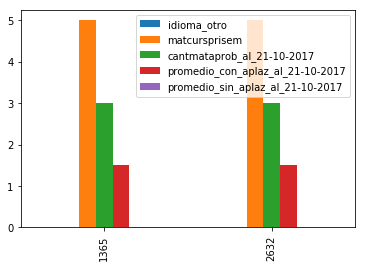

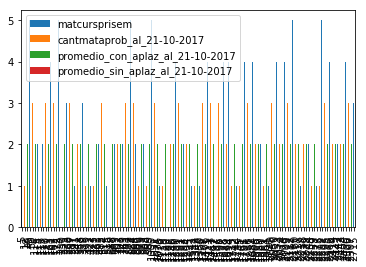

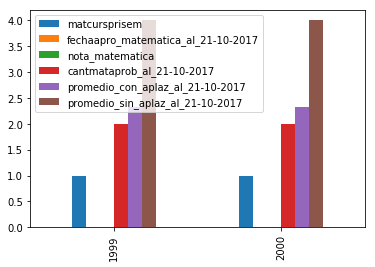

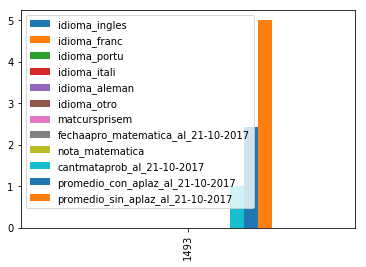

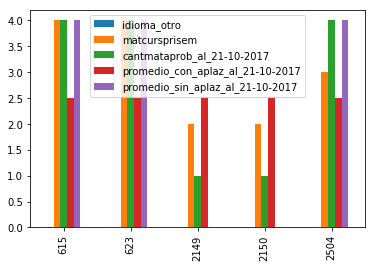

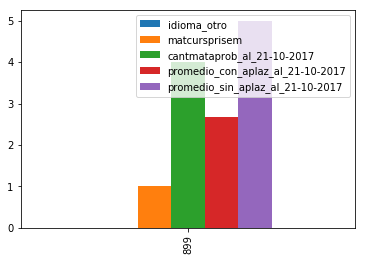

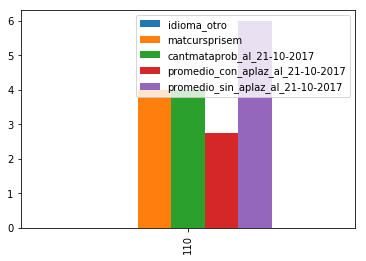

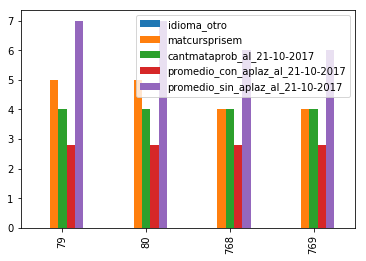

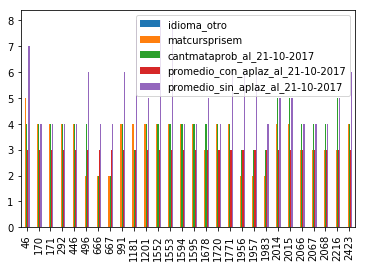

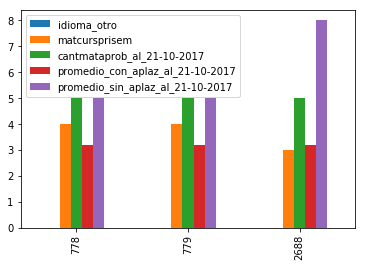

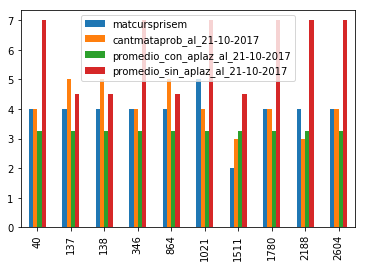

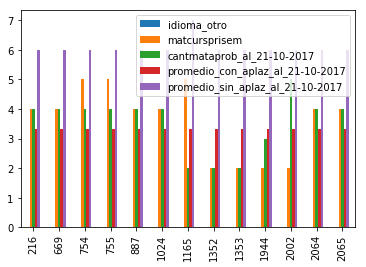

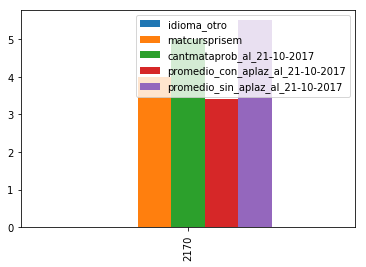

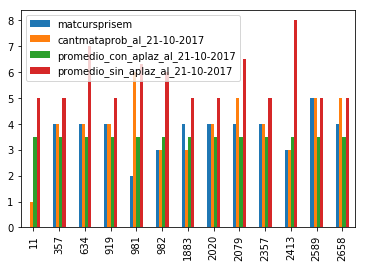

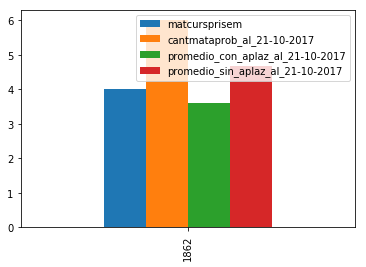

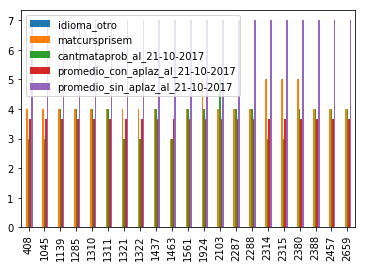

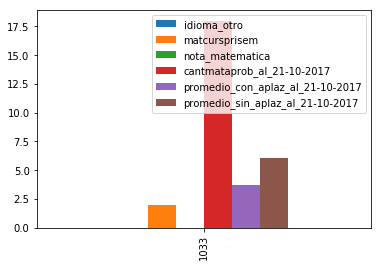

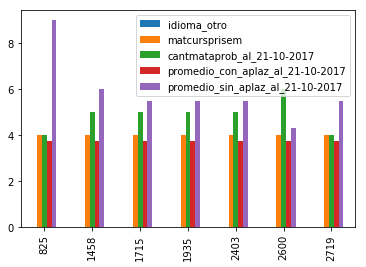

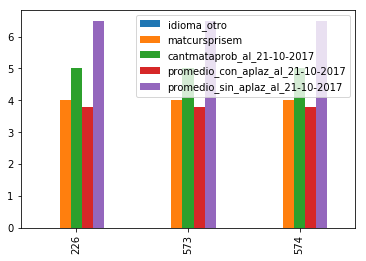

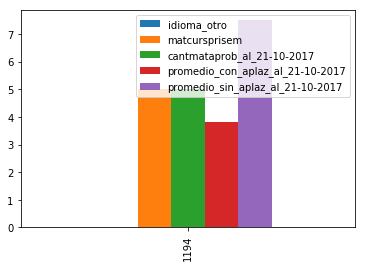

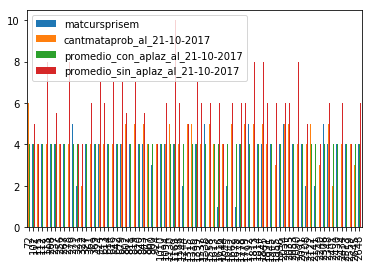

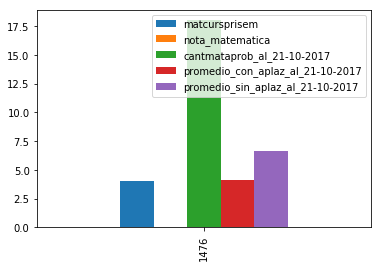

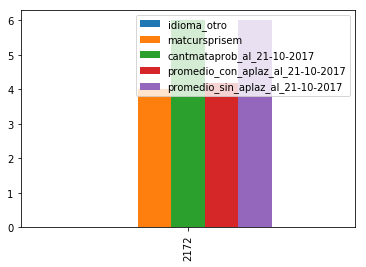

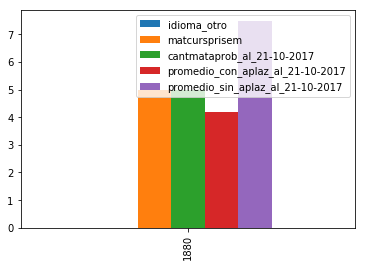

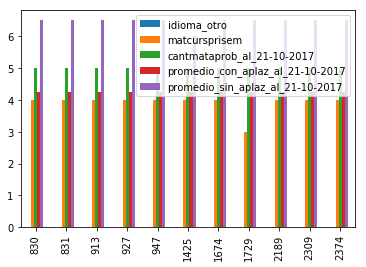

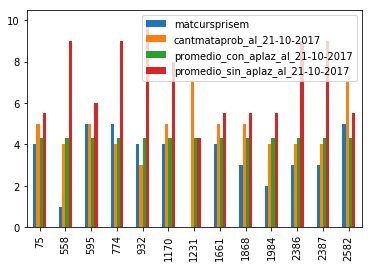

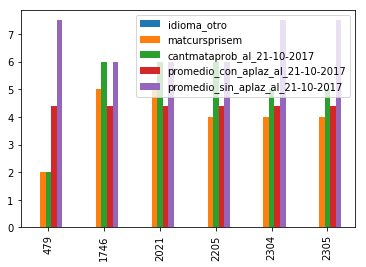

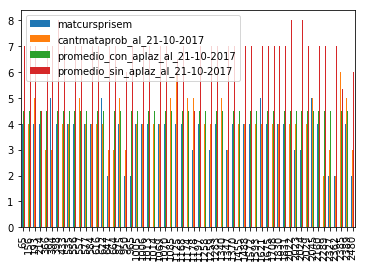

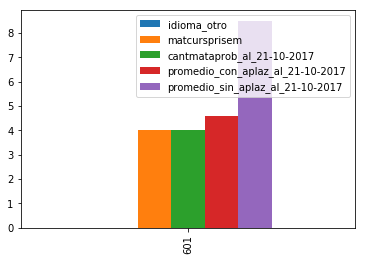

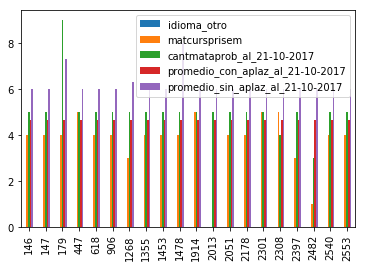

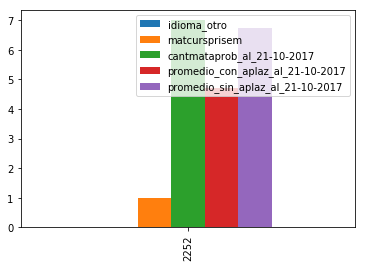

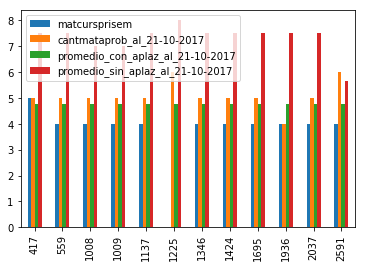

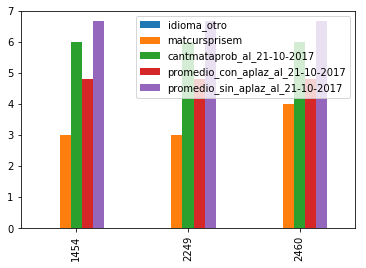

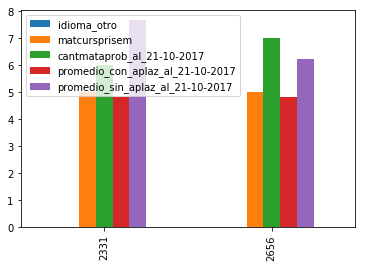

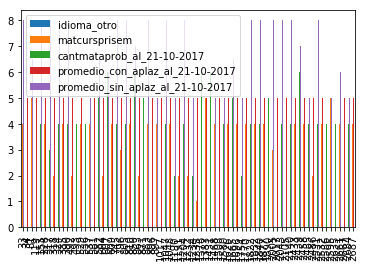

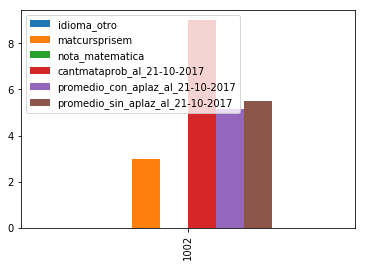

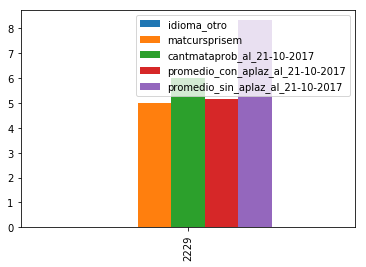

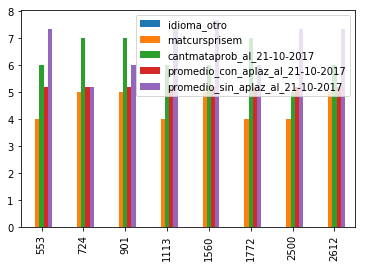

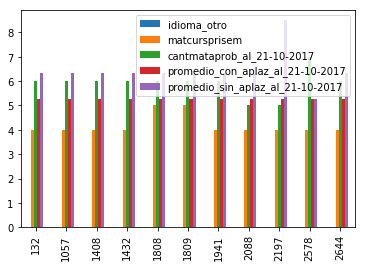

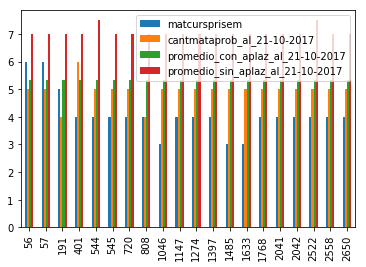

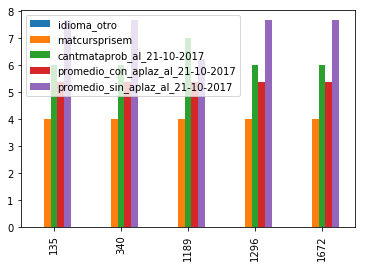

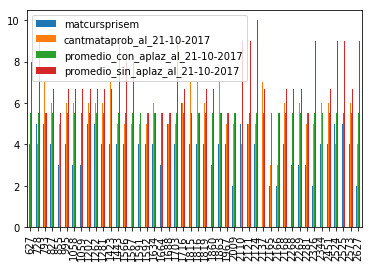

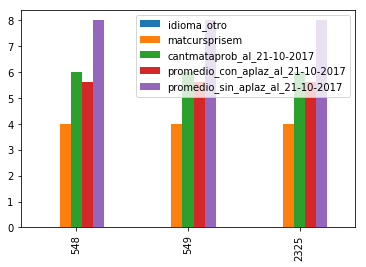

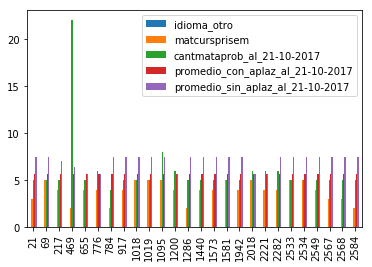

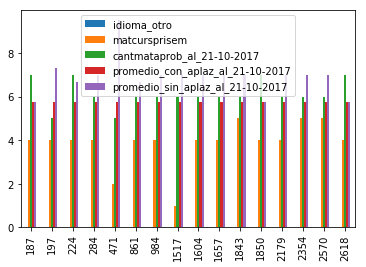

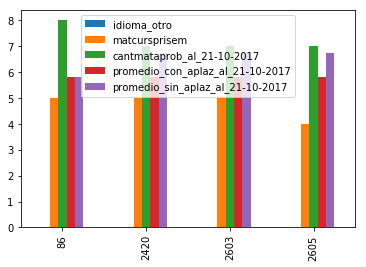

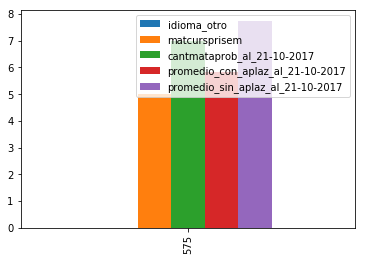

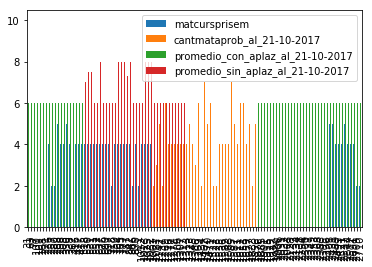

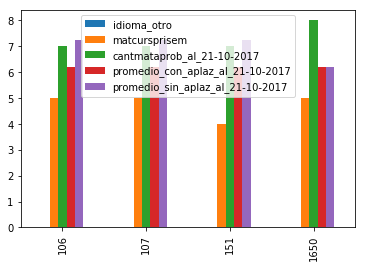

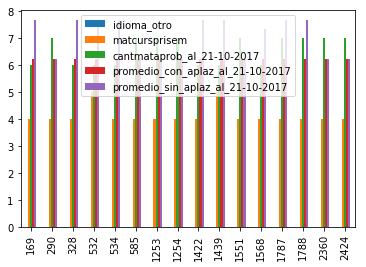

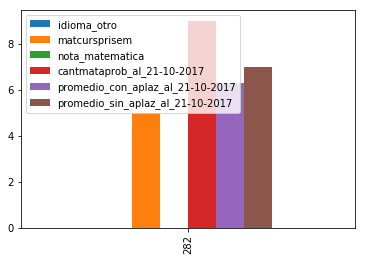

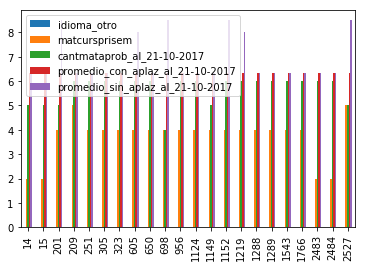

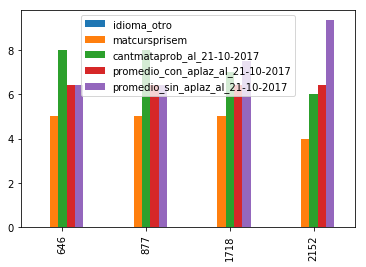

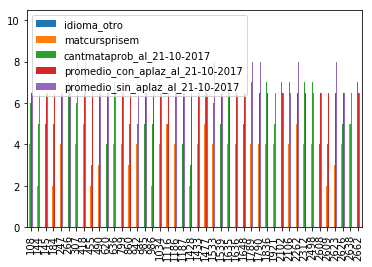

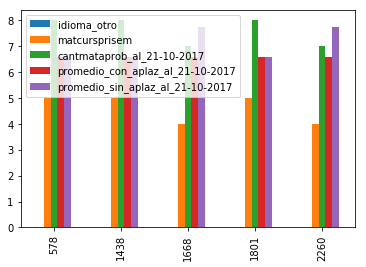

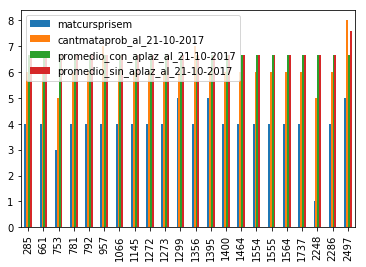

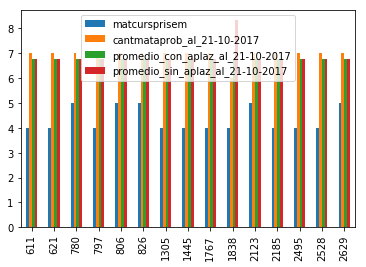

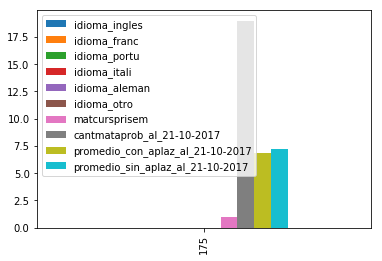

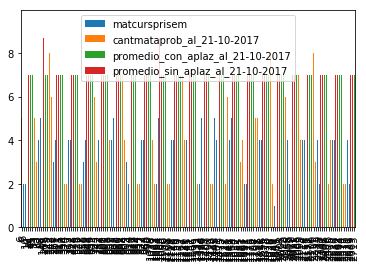

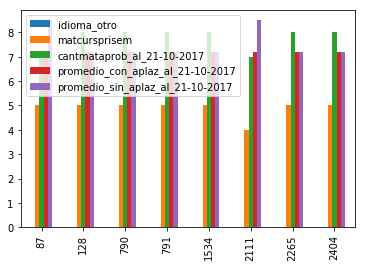

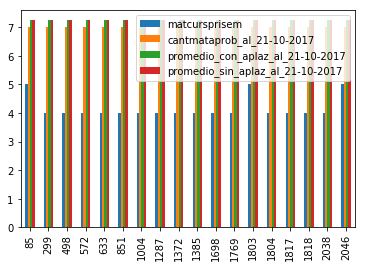

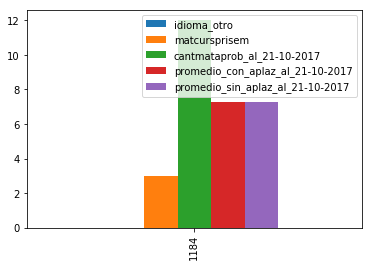

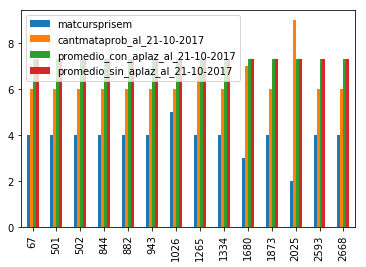

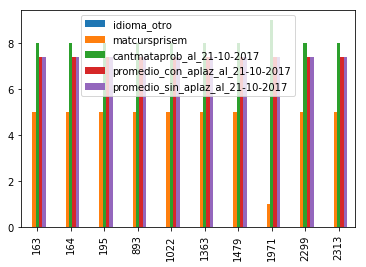

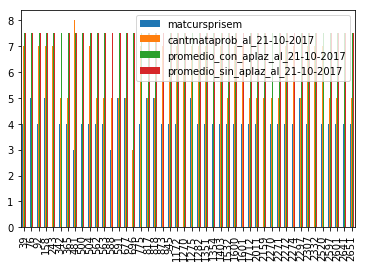

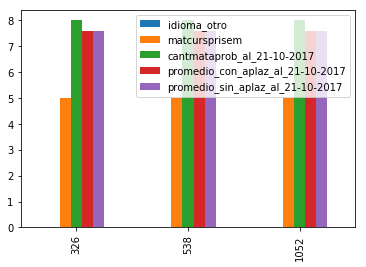

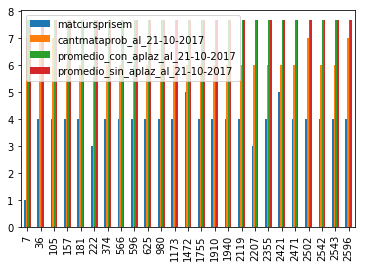

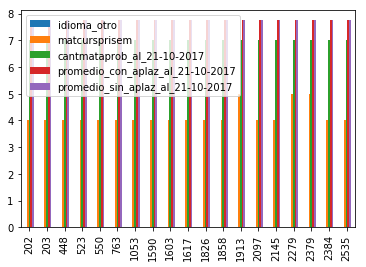

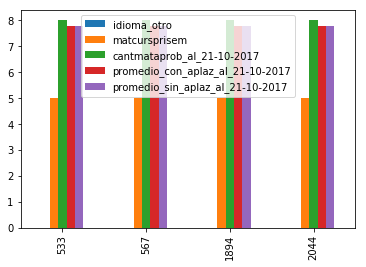

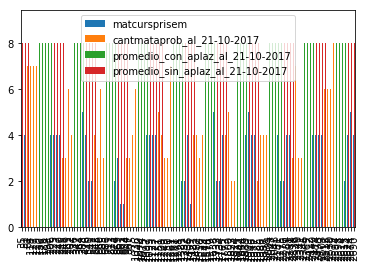

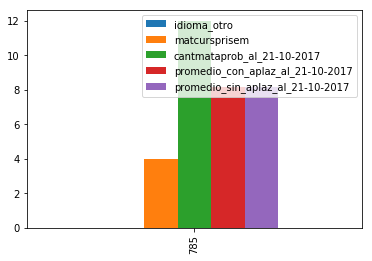

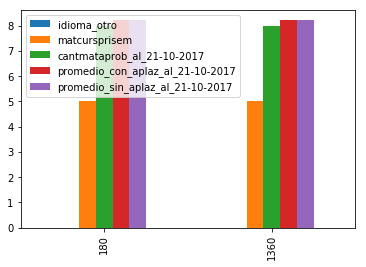

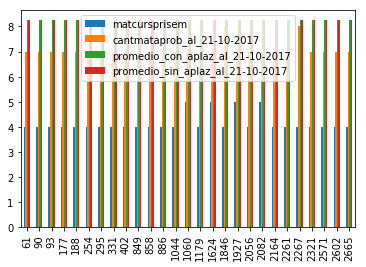

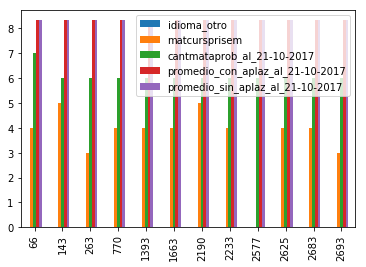

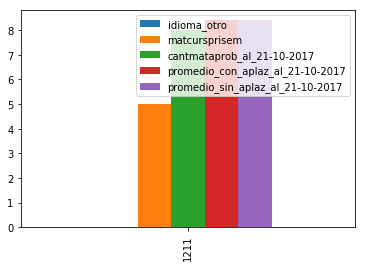

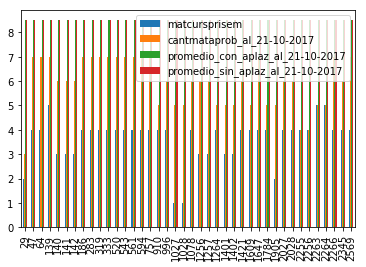

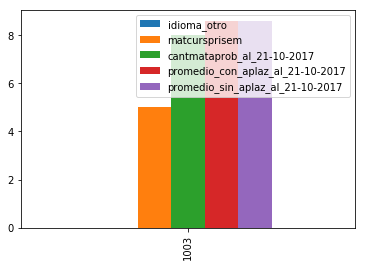

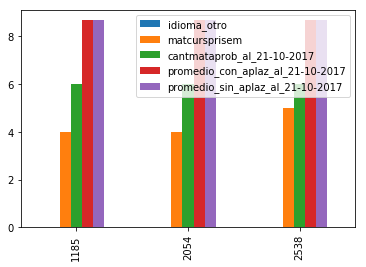

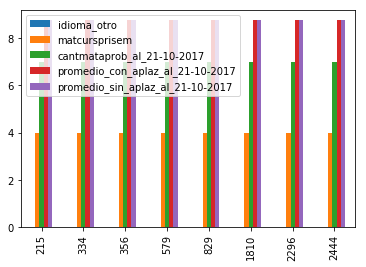

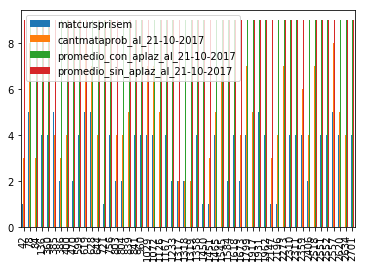

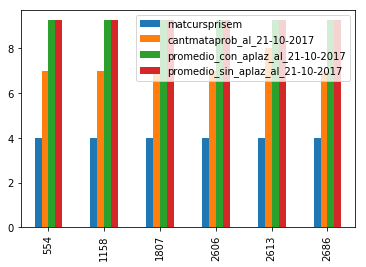

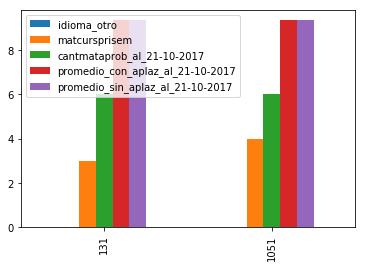

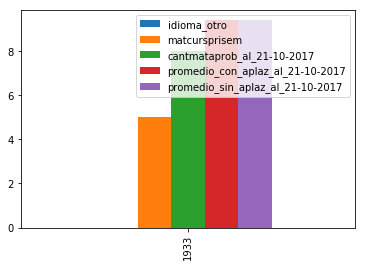

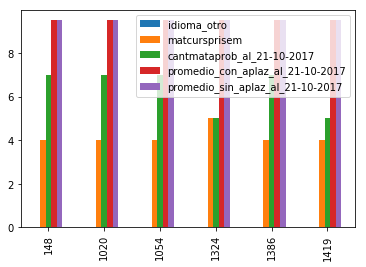

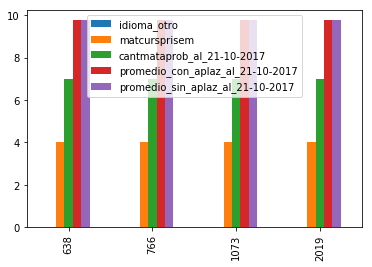

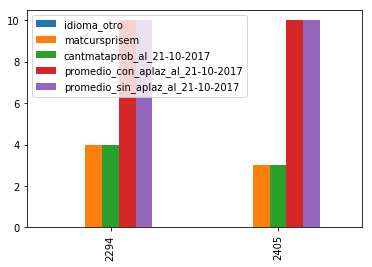

In [96]:
grp=df3.groupby("idioma_ingles")
grp.size()
my_plot = grp.plot(kind='bar')

grp=df3.groupby("promedio_con_aplaz_al_21-10-2017")
grp.size()
my_plot = grp.plot(kind='bar')




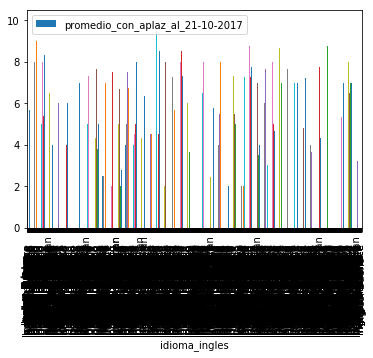

In [99]:
my_plot = df3.plot("idioma_ingles", "promedio_con_aplaz_al_21-10-2017", kind="bar")

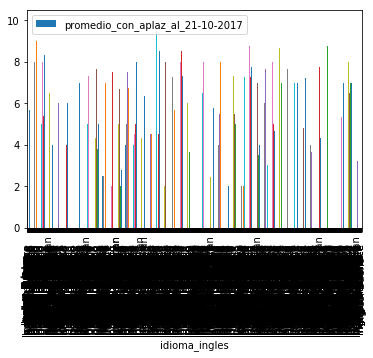

In [101]:
my_plot = df3.plot(x='idioma_ingles',y= 'promedio_con_aplaz_al_21-10-2017', kind="bar")

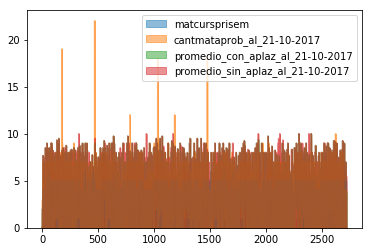

In [103]:
df3.plot.area()

In [112]:
 from pandas.plotting import radviz
    
 plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [123]:
from pandas.plotting import parallel_coordinates
plt.figure()

parallel_coordinates(df3, 'idioma_ingles',cols=['nombre_carrera','matcursprisem','fechaapro_matematica_al_21-10-2017','nota_matematica','cantmataprob_al_21-10-2017','promedio_con_aplaz_al_21-10-2017','promedio_sin_aplaz_al_21-10-2017','egresado'] colormap='gist_rainbow')


SyntaxError: invalid syntax (<ipython-input-123-25eb3659669d>, line 4)

In [125]:
df4 = df3


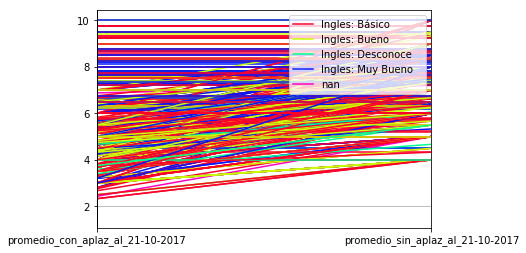

In [133]:
plt.figure()


parallel_coordinates(df4,class_column='idioma_ingles', cols=['promedio_con_aplaz_al_21-10-2017','promedio_sin_aplaz_al_21-10-2017'],colormap='gist_rainbow')


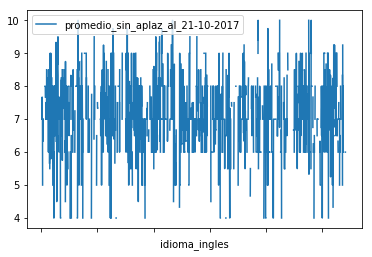

In [135]:
#df3['idioma_ingles'] = pd.Series(list(range(len(df))))

df4.plot(x='idioma_ingles', y='promedio_sin_aplaz_al_21-10-2017')

In [124]:
df4.plot_id.astype("float")
df4.regime = df3.regime.astype('category')
df4['regime_encoded'] = df4.regime.cat.codes


print(df2)
    element var 1   var 2   var 3   regime  regime_encoded
0   line 1  20      30      100     N       0
1   line 2  10      40      90      N       0
2   line 3  10      35      120     N-1     1

                          nombre_carrera         idioma_ingles  \
0                    Ciencias Biológicas  Ingles: Básico         
1                    Ciencias Geológicas  Ingles: Básico         
2              Ingeniería en Computación  Ingles: Bueno          
3                       Ingeniería Civil  Ingles: Básico         
4                    Ciencias Biológicas  Ingles: Bueno          
5                       Ingeniería Civil  Ingles: Desconoce      
6                 Ingeniería Aeronáutica  Ingles: Muy Bueno      
7                    Ciencias Biológicas  Ingles: Muy Bueno      
8                  Ingeniería Industrial  Ingles: Básico         
9                   Ingeniería Biomédica  Ingles: Básico         
10                   Ingeniería Mecánica  Ingles: Bueno          
11                   Ciencias Biológicas  Ingles: Bueno          
12             Ingeniería en Computación  Ingles: Básico         
13                    Ingeniería Química  Ingles: Básico         
14        